### Import Libraries
 

In [21]:
from scipy.io import loadmat #Scipy is a python library used for scientific computing and quite naturally, 
                             #they have a method which lets you read in .mat files.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# load mill mat file
mat_data=loadmat("mill.mat")

### Data Profiling

In [23]:
print("Data is in form of",type(mat_data)) # so the mill_data into which contents of the mat file are loaded is of dictionary type.
print("Keys of dictionary",mat_data.keys()) # the data is inside the mill key

Data is in form of <class 'dict'>
Keys of dictionary dict_keys(['__header__', '__version__', '__globals__', 'mill'])


In [24]:
print("Mill data is in form of",type(mat_data['mill']))
mat_data['mill'].shape #so there are total 167 experimental runs 

Mill data is in form of <class 'numpy.ndarray'>


(1, 167)

In [25]:
mill_data=mat_data['mill']
mill_data.dtype # a structured datatype

dtype([('case', 'O'), ('run', 'O'), ('VB', 'O'), ('time', 'O'), ('DOC', 'O'), ('feed', 'O'), ('material', 'O'), ('smcAC', 'O'), ('smcDC', 'O'), ('vib_table', 'O'), ('vib_spindle', 'O'), ('AE_table', 'O'), ('AE_spindle', 'O')])

In [26]:
mill_data.dtype.names #to access the field names of a structured datatype use the names attribute of the dtype object

('case',
 'run',
 'VB',
 'time',
 'DOC',
 'feed',
 'material',
 'smcAC',
 'smcDC',
 'vib_table',
 'vib_spindle',
 'AE_table',
 'AE_spindle')

### Exploring for first experimental run 

In [27]:
mill_data.shape #a 2D array

(1, 167)

In [28]:
mill_data[0].shape #a 1D array

(167,)

In [29]:
mill_data[0,0]#this gives you the values for only the fields for first row out of total 167 rows.

(array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8), array([[2]], dtype=uint8), array([[1.5]]), array([[0.5]]), array([[1]], dtype=uint8), array([[-0.01708984],
       [ 0.26367188],
       [ 0.20751953],
       ...,
       [-0.80810547],
       [-0.73242188],
       [-0.57617188]]), array([[0.625     ],
       [0.81054688],
       [0.78125   ],
       ...,
       [1.38183594],
       [1.30371094],
       [1.52832031]]), array([[0.078125  ],
       [0.08544922],
       [0.078125  ],
       ...,
       [0.27587891],
       [0.52246094],
       [0.37841797]]), array([[0.31494141],
       [0.30151367],
       [0.30395508],
       ...,
       [0.3125    ],
       [0.31738281],
       [0.3112793 ]]), array([[0.08728027],
       [0.0982666 ],
       [0.09216309],
       ...,
       [0.10131836],
       [0.12756348],
       [0.12329102]]), array([[0.10375977],
       [0.12329102],
       [0.10498047],
       ...,
       [0.10681152],
       [0.11230469],
       [0

In [30]:
mill_data[0,0]['case'][0][0] #to access the values within the field

1

In [112]:
# Lets print what is what are the values of the fields for the first row
# First lets see the operating conditions
fields= mill_data.dtype.names
for field in fields[0:7]:
    print(f"Value of {field} is {mill_data[0,0][field][0][0]}")

#Lets see the shape of 6 sensors data:
for field in fields[7:]:
     print(f"Shape of {field} is {mill_data[0,0][field].shape}")

Value of case is 1
Value of run is 1
Value of VB is 0
Value of time is 2
Value of DOC is 1.5
Value of feed is 0.5
Value of material is 1
Shape of smcAC is (9000, 1)
Shape of smcDC is (9000, 1)
Shape of vib_table is (9000, 1)
Shape of vib_spindle is (9000, 1)
Shape of AE_table is (9000, 1)
Shape of AE_spindle is (9000, 1)


### Seeing the trend of sensors for first experimental run

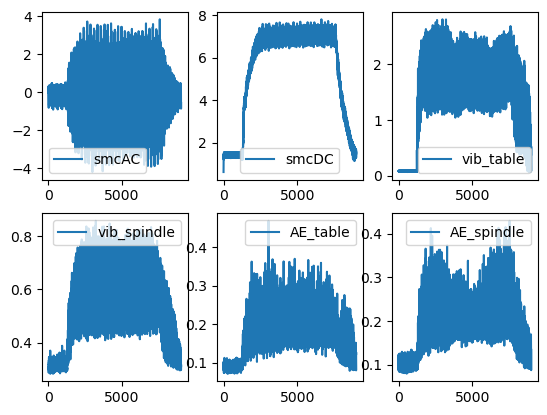

In [17]:
plt.subplot(2,3,1)
plt.plot(mill_data[0,0]["smcAC"],label="smcAC")
plt.legend()

plt.subplot(2,3,2)
plt.plot(mill_data[0,0]["smcDC"],label="smcDC")
plt.legend()

plt.subplot(2,3,3)
plt.plot(mill_data[0,0]["vib_table"],label="vib_table")
plt.legend()

plt.subplot(2,3,4)
plt.plot(mill_data[0,0]["vib_spindle"],label="vib_spindle")
plt.legend()

plt.subplot(2,3,5)
plt.plot(mill_data[0,0]["AE_table"],label="AE_table")
plt.legend()

plt.subplot(2,3,6)
plt.plot(mill_data[0,0]["AE_spindle"],label="AE_spindle")
plt.legend()


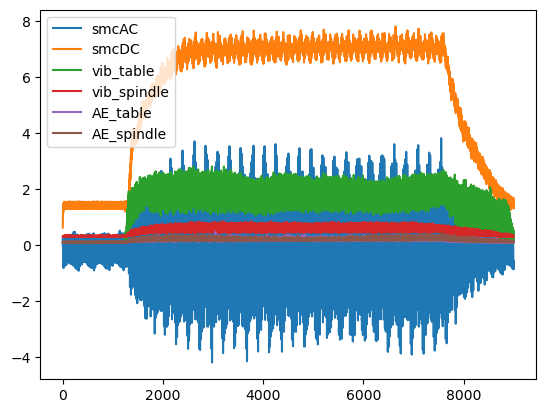

In [18]:

fig, ax = plt.subplots()

ax.plot(mill_data[0,0]['smcAC'], label='smcAC')
ax.plot(mill_data[0,0]['smcDC'], label='smcDC')
ax.plot(mill_data[0,0]['vib_table'], label='vib_table')
ax.plot(mill_data[0,0]['vib_spindle'], label='vib_spindle')
ax.plot(mill_data[0,0]['AE_table'], label='AE_table')
ax.plot(mill_data[0,0]['AE_spindle'], label='AE_spindle')

plt.legend()

### Plot for first five experimental runs

In [19]:
for iteration in range(5):
    fig, ax = plt.subplots()

    ax.plot(mill_data[0,iteration]['smcAC'], label='smcAC')
    ax.plot(mill_data[0,iteration]['smcDC'], label='smcDC')
    ax.plot(mill_data[0,iteration]['vib_table'], label='vib_table')
    ax.plot(mill_data[0,iteration]['vib_spindle'], label='vib_spindle')
    ax.plot(mill_data[0,iteration]['AE_table'], label='AE_table')
    ax.plot(mill_data[0,iteration]['AE_spindle'], label='AE_spindle')

    plt.legend()
    plt.savefig(f"plot_{iteration}.png")
    plt.close()

##### As such no anomalus condition is detected in fist five experimental runs.

### Plot for all experimental runs

KeyboardInterrupt: 

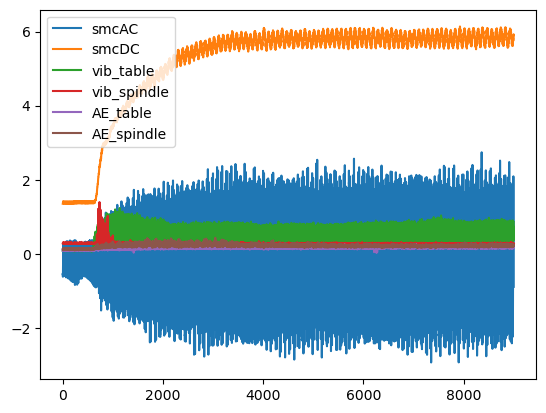

In [20]:
for iteration in range(167):
    fig, ax = plt.subplots()

    ax.plot(mill_data[0,iteration]['smcAC'], label='smcAC')
    ax.plot(mill_data[0,iteration]['smcDC'], label='smcDC')
    ax.plot(mill_data[0,iteration]['vib_table'], label='vib_table')
    ax.plot(mill_data[0,iteration]['vib_spindle'], label='vib_spindle')
    ax.plot(mill_data[0,iteration]['AE_table'], label='AE_table')
    ax.plot(mill_data[0,iteration]['AE_spindle'], label='AE_spindle')

    plt.legend()
    plt.savefig(f"plot_{iteration}.png")
    plt.close()

##### After generating all the plots, the anomalus condition can be observed at iteration number 17, 94 and 105

### Generating plots for VB

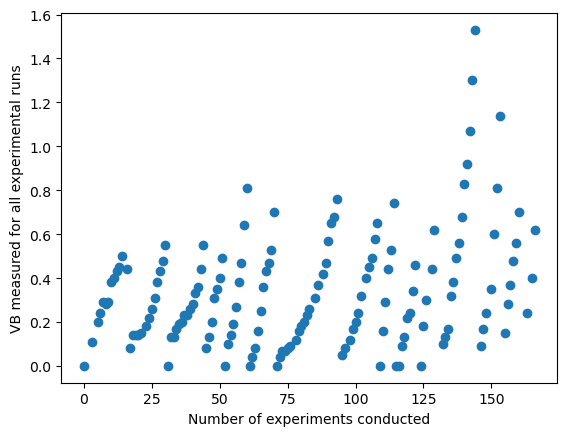

In [68]:
VB_field=fields[2]
case_field=fields[0]
VB_array=[]
case_array=[]
dict={}
for iter in range(167):
    VB_array.append(mill_data[0,iter][VB_field][0][0])
    case_array.append(mill_data[0,iter][case_field][0][0])

dict['case']=case_array
dict['VB']=VB_array


data=pd.DataFrame(dict)
plt.plot(VB_array,'o')
plt.ylabel('VB measured for all experimental runs')
plt.xlabel('Number of experiments conducted')
plt.savefig("VB_for_all_plots")

In [71]:
for iter in range(1,17):
    data_iter=data[data['case']==iter]
    plt.plot(data_iter['VB'],'o',label=f'Case {iter}')
    plt.ylabel('VB measured for all experimental runs')
    plt.xlabel('Number of experiments conducted')
    plt.legend()
    plt.savefig(f"plot_{iter}.png")
    plt.close()

### Generating plots for visualizing sensor data trends for case 1

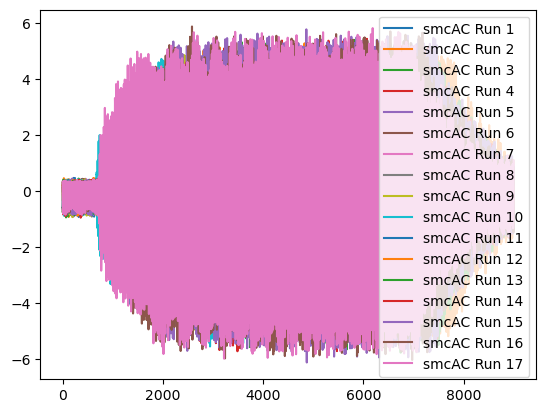

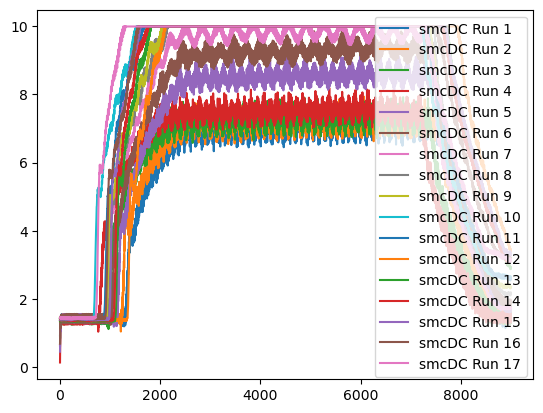

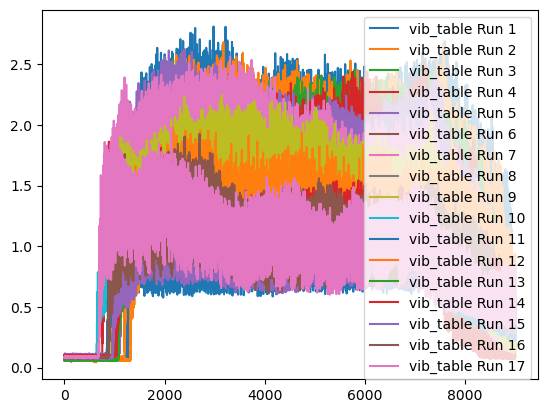

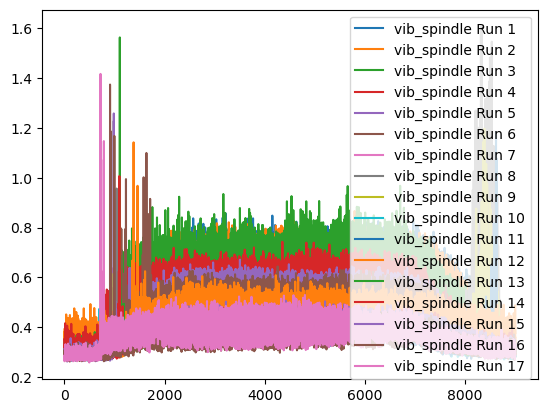

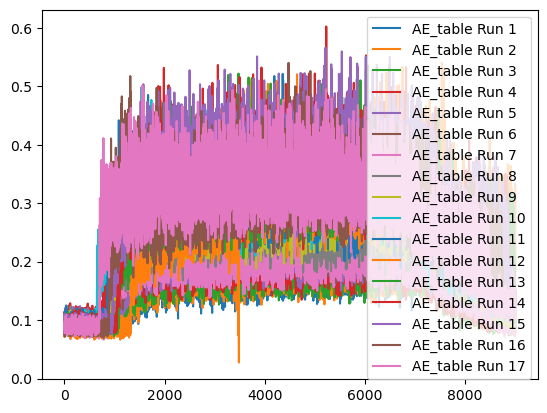

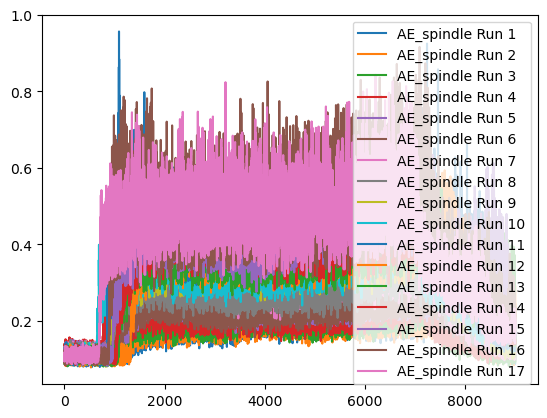

In [113]:
sensor_fields=fields[7:13]

run_field=fields[1]
run_array=[]
for iter in range(167):
    run_array.append(mill_data[0,iter][run_field][0][0])
    
dict['run']=run_array
data=pd.DataFrame(dict)

num_runs=data[data['case']==1]['run']
indexes=data[data['case']==1].index

for sensor in sensor_fields:
    fig, ax = plt.subplots()
    count=0
    for index in indexes:
        count=count+1
        ax.plot(mill_data[0,index][sensor], label=f"{sensor} Run {count}")
        plt.legend()
    
    plt.savefig(f"plot_case 1_{sensor}.png")
    


### Generating plots for visualizing sensor data trends for case 13

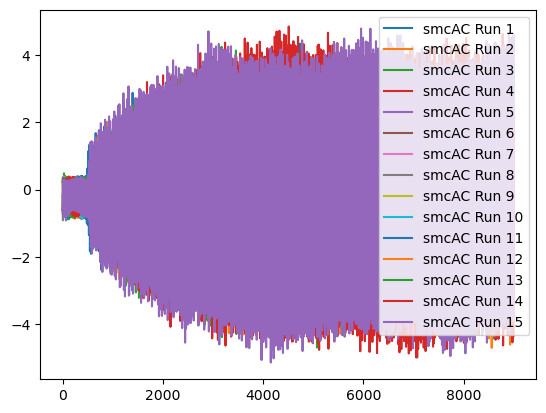

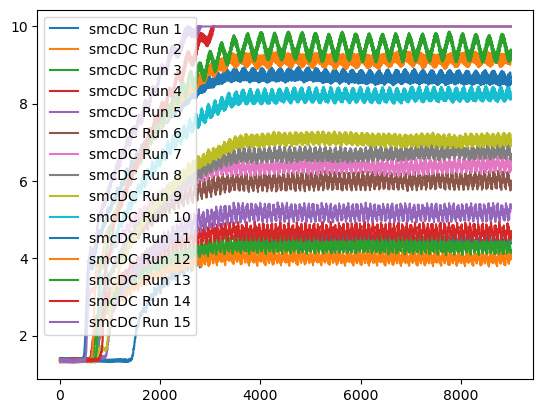

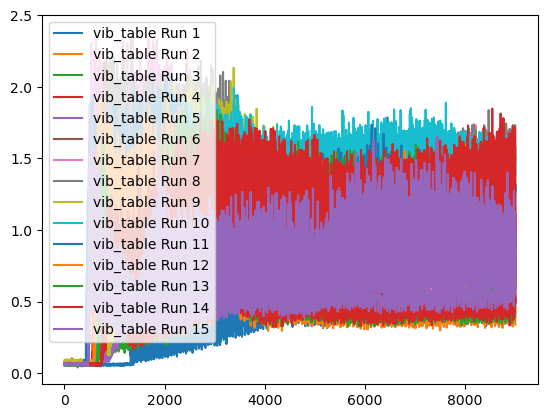

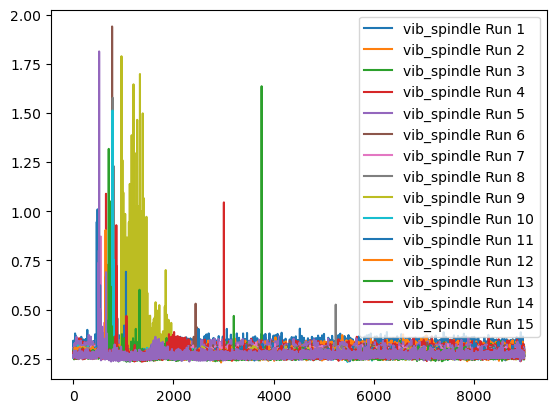

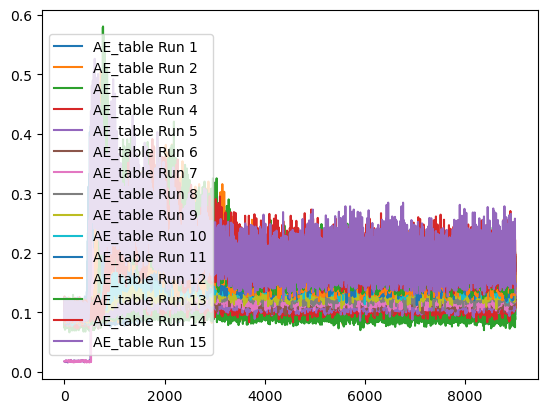

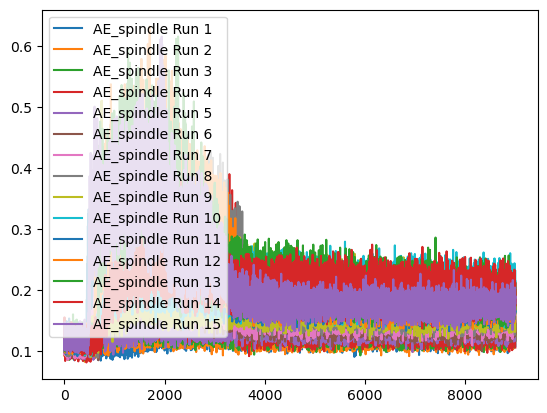

In [114]:
sensor_fields=fields[7:13]

run_field=fields[1]
run_array=[]
for iter in range(167):
    run_array.append(mill_data[0,iter][run_field][0][0])
    
dict['run']=run_array
data=pd.DataFrame(dict)

num_runs=data[data['case']==13]['run']
indexes=data[data['case']==13].index

for sensor in sensor_fields:
    fig, ax = plt.subplots()
    count=0
    for index in indexes:
        count=count+1
        ax.plot(mill_data[0,index][sensor], label=f"{sensor} Run {count}")
        plt.legend()
    
    plt.savefig(f"plot_case 13_{sensor}.png")


In [80]:
data

,case,VB,run
0,1,0.00,1
1,1,NaN,2
2,1,NaN,3
3,1,0.11,4
4,1,NaN,5
...,...,...,...
162,16,NaN,2
163,16,0.24,3
164,16,NaN,4
165,16,0.40,5


In [83]:
indexes=data[data['case']==13].index
indexes

Int64Index([130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
            143, 144],
           dtype='int64')